In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn as nn
import h5py
import tables
import numpy as np
import pickle
from functools import reduce
from tableone import TableOne

In [4]:
# device = torch.device('cpu')
device = torch.device('cuda:0')

In [5]:
import os
os.chdir('/home/aisinai/work/repos/nis_patient_encoding/')

In [13]:
from data.data_loader import NISDatabase
from data.preprocess_nis import *

/home/aisinai/work/repos/nis_patient_encoding/data/preprocess_nis.py:141: DeprecationWarning: invalid escape sequence \d
  scale = 10**(4 - len_code)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
class Configuration(object):
    
    DATA_PATTERN = 'nis_Y_total.sas7bdat'
    DATA_FOLDER = 'data/raw/archive/'
    
    MISS_VAL_FILL = -128
    MISSING_VALS = ['A', 'B', 'C', 'M', 'F', 'B', 'invl', 'incn', MISS_VAL_FILL]

    
    SCHEMA_DICT = {
        'AGE': {'dtype': 'uint8', 'map': []},
        'AGE_NEONATE': {'dtype': 'int8', 'map': []},
        'AMONTH': {'dtype': 'int8', 'map': []},
        'AWEEKEND': {'dtype': 'int8', 'map': []},
        'BODYSYSTEMn': {'dtype': 'int8', 'map': []},
        'CHRONn': {'dtype': 'int8', 'map': []},
        'CHRONBn': {'dtype': 'int8', 'map': []},
        'CM_': {'dtype': 'int8', 'map': []},
        'DIED': {'dtype': 'int8', 'map': []},
        'DISCWT': {'dtype': 'float64', 'map': []},
        'DISPUNIFORM': {'dtype': 'int8', 'map': []},
        'DQTR': {'dtype': 'int8', 'map': []},
        'DRG': {'dtype': 'int32', 'map': []},
        'DRG24': {'dtype': 'int32', 'map': []},
        'DRGVER': {'dtype': 'int32', 'map': []},
        'DRG_NOPOA': {'dtype': 'int32', 'map': []},
        'DXn': {'dtype': 'int32', 'map': [map_icd9_codes, ]},
        'DXCCSn': {'dtype': 'int32', 'map': []},
        'DXMCCSn': {'dtype': 'int32', 'map': [map_mccs_codes, ]},
        'DXVER': {'dtype': 'int8', 'map': []},
        'E_MCCSn': {'dtype': 'int32', 'map': [map_mccs_codes, ]},
        'ECODEn': {'dtype': 'int32', 'map': [map_ecode_codes, ]},
        'ELECTIVE': {'dtype': 'int8', 'map': []},
        'E_CCSn': {'dtype': 'int32', 'map': []},
        'FEMALE': {'dtype': 'int8', 'map': []},
        'HCUP_ED': {'dtype': 'int32', 'map': []},
        'HOSPBRTH': {'dtype': 'int8', 'map': []},
        'HOSP_DIVISION': {'dtype': 'int8', 'map': []},
        'HOSP_NIS': {'dtype': 'int64', 'map': []},
        'KEY_NIS': {'dtype': 'int64', 'map': []},
        'LOS': {'dtype': 'int8', 'map': []},
        'MDC': {'dtype': 'int16', 'map': []},
        'MDC24': {'dtype': 'int16', 'map': []},
        'MDC_NOPOA': {'dtype': 'int16', 'map': []},
        'NCHRONIC': {'dtype': 'int8', 'map': []},
        'NDX': {'dtype': 'uint8', 'map': []},
        'NECODE': {'dtype': 'uint8', 'map': []},
        'NEOMAT': {'dtype': 'uint8', 'map': []},
        'NIS_STRATUM': {'dtype': 'uint32', 'map': []},
        'NPR': {'dtype': 'uint8', 'map': []},
        'ORPROC': {'dtype': 'int8', 'map': []},
        'PAY1': {'dtype': 'int8', 'map': []},
        'PCLASSn': {'dtype': 'int8', 'map': []},
        'PL_NCHS2006': {'dtype': 'int8', 'map': []},
        'PL_NCHS': {'dtype': 'int8', 'map': []},
        'PRn': {'dtype': 'int32', 'map': [map_icd9_codes, ]},
        'PRCCSn': {'dtype': 'int16', 'map': []},
        'PRDAYn': {'dtype': 'int16', 'map': []},
        'PRMCCS1': {'dtype': 'int32', 'map': [map_mccs_codes, ]},
        'PRVER': {'dtype': 'int8', 'map': []},
        'RACE': {'dtype': 'int8', 'map': []},
        'SERVICELINE': {'dtype': 'int8', 'map': []},
        'TOTCHG': {'dtype': 'int32', 'map': []},
        'TRAN_IN': {'dtype': 'int8', 'map': []},
        'TRAN_OUT': {'dtype': 'int8', 'map': []},
        'YEAR': {'dtype': 'int16', 'map': []},
        'ZIPINC_QRTL': {'dtype': 'int8', 'map': []},
        'APRDRG': {'dtype': 'int8', 'map': []},
        'APRDRG_RISK_MORTALITY': {'dtype': 'int8', 'map': []},
        'APRDRG_SEVERITY': {'dtype': 'int8', 'map': []}
    }

config = Configuration()

## Fire it up!

In [17]:
preproc = NISPreprocessor(config.DATA_PATTERN, config.DATA_FOLDER)

In [26]:
preproc.find_all_years()
preproc.years

{'2011': {'file': 'nis_2011_total.sas7bdat'},
 '2006': {'file': 'nis_2006_total.sas7bdat'},
 '2016': {'file': 'nis_2016_total.sas7bdat'},
 '2007': {'file': 'nis_2007_total.sas7bdat'},
 '2004': {'file': 'nis_2004_total.sas7bdat'},
 '2015': {'file': 'nis_2015_total.sas7bdat'},
 '2005': {'file': 'nis_2005_total.sas7bdat'},
 '2017': {'file': 'nis_2017_total.sas7bdat'},
 '2009': {'file': 'nis_2009_total.sas7bdat'},
 '2008': {'file': 'nis_2008_total.sas7bdat'},
 '2010': {'file': 'nis_2010_total.sas7bdat'},
 '2003': {'file': 'nis_2003_total.sas7bdat'}}

In [43]:
pd.DataFrame().join(
    pd.Series(np.random.rand(3), index=['a', 'b', 'c'], name='2'), how='outer').join(
    pd.Series(np.random.rand(3), index=['a', 'b', 'd'], name='3'), how='outer')

,2,3
a,0.518959,0.448965
b,0.177468,0.396065
c,0.467846,NaN
d,NaN,0.791925


In [53]:
preproc.get_column_coverage()
preproc.column_coverage

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2015,2016,2017
AGE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AGEDAY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
AGE_NEONATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
AMONTH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
APRDRG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TRAN_IN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TRAN_OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
TRENDWT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
YEAR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
[re.split(r'(-?\d*\.?\d+)', col) for col in preproc.column_coverage.index]

[['AGE'],
 ['AGEDAY'],
 ['AGE_NEONATE'],
 ['AMONTH'],
 ['APRDRG'],
 ['APRDRG_RISK_MORTALITY'],
 ['APRDRG_SEVERITY'],
 ['APSDRG'],
 ['APSDRG_CHARGE_WEIGHT'],
 ['APSDRG_LOS_WEIGHT'],
 ['APSDRG_MORTALITY_WEIGHT'],
 ['ASOURCE'],
 ['ASOURCEUB', '92', ''],
 ['ASOURCE_X'],
 ['ATYPE'],
 ['AWEEKEND'],
 ['BODYSYSTEM', '1', ''],
 ['BODYSYSTEM', '10', ''],
 ['BODYSYSTEM', '11', ''],
 ['BODYSYSTEM', '12', ''],
 ['BODYSYSTEM', '13', ''],
 ['BODYSYSTEM', '14', ''],
 ['BODYSYSTEM', '15', ''],
 ['BODYSYSTEM', '16', ''],
 ['BODYSYSTEM', '17', ''],
 ['BODYSYSTEM', '18', ''],
 ['BODYSYSTEM', '19', ''],
 ['BODYSYSTEM', '2', ''],
 ['BODYSYSTEM', '20', ''],
 ['BODYSYSTEM', '21', ''],
 ['BODYSYSTEM', '22', ''],
 ['BODYSYSTEM', '23', ''],
 ['BODYSYSTEM', '24', ''],
 ['BODYSYSTEM', '25', ''],
 ['BODYSYSTEM', '26', ''],
 ['BODYSYSTEM', '27', ''],
 ['BODYSYSTEM', '28', ''],
 ['BODYSYSTEM', '29', ''],
 ['BODYSYSTEM', '3', ''],
 ['BODYSYSTEM', '30', ''],
 ['BODYSYSTEM', '4', ''],
 ['BODYSYSTEM', '5', ''],
 ['BODYSY

In [70]:
preproc.column_coverage.dropna()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2015,2016,2017
AGE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AMONTH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
APRDRG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
APRDRG_RISK_MORTALITY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
APRDRG_SEVERITY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AWEEKEND,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DIED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DISCWT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DISPUNIFORM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DQTR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


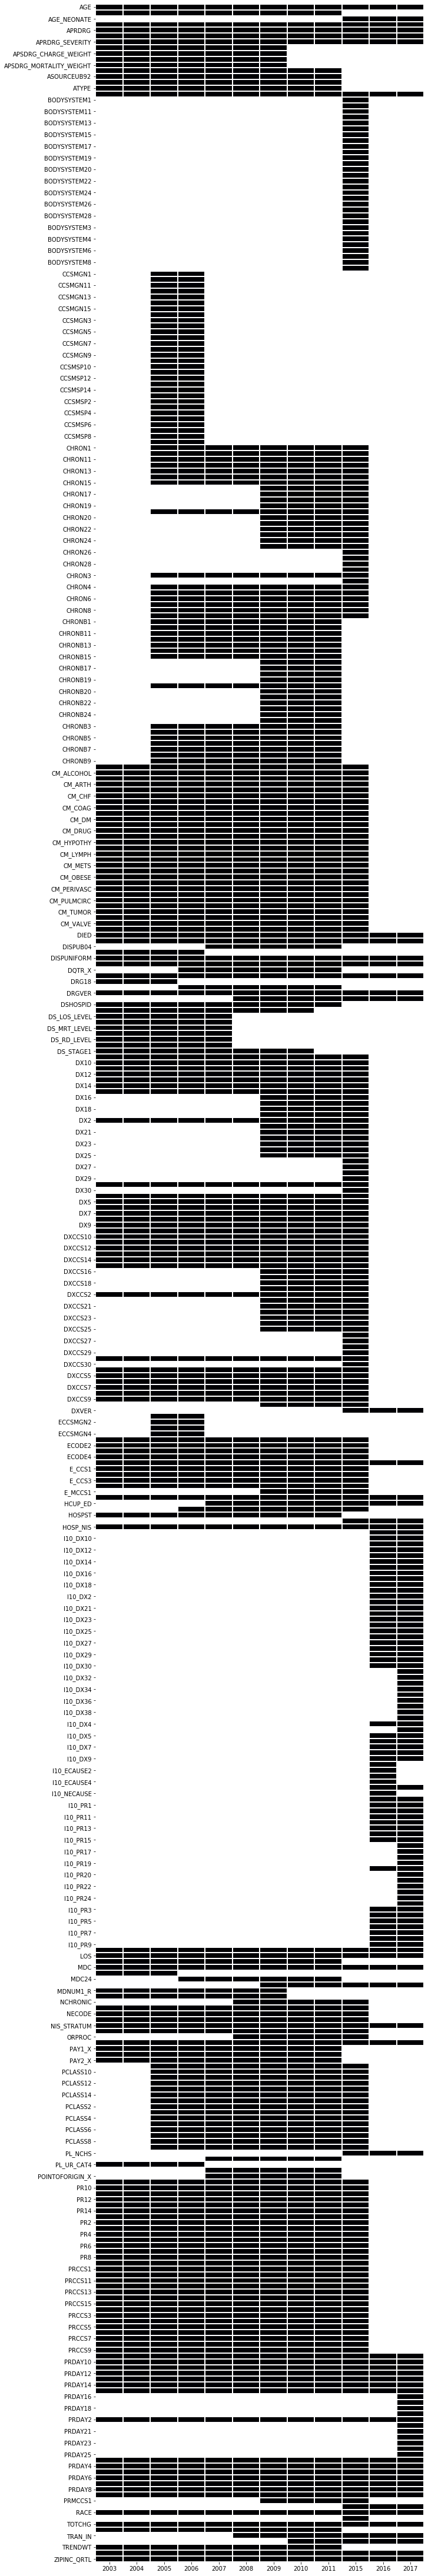

In [65]:
plt.subplots(figsize=(10, 80))
sns.heatmap(preproc.column_coverage, linewidths=1, cmap='magma', cbar=False)